# python intro

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline # to keep plots in notebook
# Pyplot, the plotting framework can now be accessed using alias ‘plt’

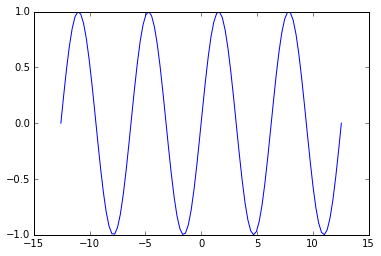

In [5]:
data = np.array([1,2,3], dtype='float32')

data.shape # L means long integer

# List comprehension
[x**2 for x in range(5)] # Note that range() goes from 0 to n-1

# Quick overview of plotting
# Make 100 uniform points between # -4pi and 4pi
x = np.linspace(- 4*np.pi, 4*np.pi, num=100)

# Calculate y targets
# Note: np.sin(x) is “broadcast” to all elements of x
y = np.sin(x)
plt.plot(x,y)

# Image display example

In [6]:
# Quick overview of displaying images
# Load data
from keras.datasets import mnist 
# Dataset of 60,000 28x28 grayscale images of the 10 digits, 
# along with a test set of 10,000 images.
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

15302656/15296311 [==============================] - 4s     


In [17]:
X_train.shape #(60000, 28, 28) 60000 obs, 28 by 28 pixels
X_train[0] #values (pixels) in ndarray are num. in RGB representing colors

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

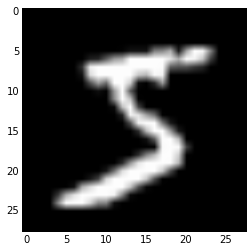

In [7]:
# Plot image
plt.imshow(X_train[0], cmap='gray') #imshow takes pixels and aplot

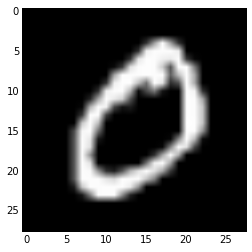

In [19]:
# This shows the first image, try:
plt.imshow(X_train[1], cmap='gray') # cmap means color map

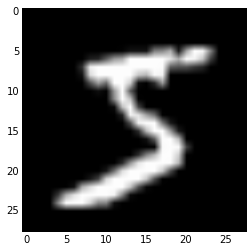

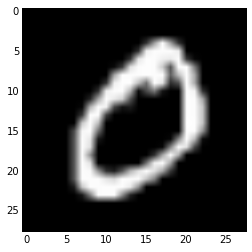

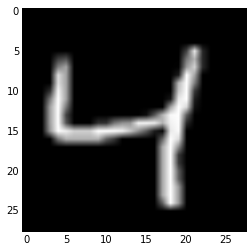

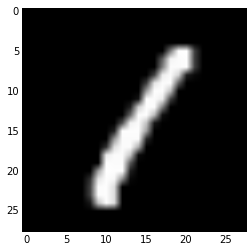

In [22]:
for i in range(4):
    plt.imshow(X_train[i], cmap='gray')
    plt.show()

# MNIST classification Example

In [35]:
# Goal: Correctly classify '3'
# Basic setup
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape #28 by 28 = 784 piexls
y_test[:10] # list of numbers from 0-9

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [32]:
# Reshape examples as vectors (see example code)
Xv_train = X_train.reshape((-1, 784)) # matrix with 784 columns
Xv_test = X_test.reshape((-1, 784))
 
Xv_train.shape

# The new shape should be compatible with the original shape. 
# If an integer, then the result will be a 1-D array of that length. 
# One shape dimension can be -1. In this case, the value is inferred 
# from the length of the array and remaining dimensions

(60000, 784)

In [33]:
#%% Define classifier (lecture 2 slide 36)
def sigmoid(x): # X is a vector
    return 1 / (1 + np.e**(-x))

def classify(w, x): # W: weight vector
    return sigmoid(np.dot(w, x)) # get fw(x)

def test_accuracy(w): # W: weight vector
    ncorrect = 0
    for (ex, cls) in zip(Xv_test, y_test):
        prediction = 3 if classify(w, ex) > 0.5 else 0 
        # 0.5 is the threshold
        if cls == prediction:
            ncorrect += 1
    print("Test accuracy: %d/%d = %0.2f %%" % (ncorrect, len(y_test),
                                           100.0*ncorrect/len(y_test)))

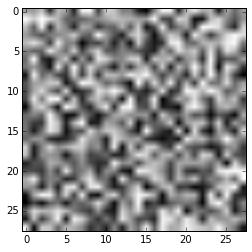

In [36]:
#%% Dumb luck classifier
w_candidates = []

for i in range(50): 
    w_candidates.append(np.random.rand(784)) # create a radom w vector
    
def show(x):
    plt.imshow(x.reshape((28,28,)), cmap='gray') # reshape w to 28 by 28
    plt.show()
    
# Show one random candidate
show(w_candidates[0])

In [45]:
#%% Try one candidate w
test_accuracy(w_candidates[0])

Test accuracy: 1010/10000 = 10.10 %


In [42]:
# Can we do better than “dumb luck”?
# Idea1: Use an existing ‘3’
w = X_train[7].reshape((-1, 784))
test_accuracy(w)

Test accuracy: 980/10000 = 9.80 %


In [46]:
# Idea2: Use some existing digits as weight templates

# Classifier in Keras

In [49]:
import keras, keras.datasets.mnist, keras.utils.np_utils as np_utils
import keras.models as models,keras.layers.core as layers,keras.optimizers

(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data() 
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32') / 255.0 # normalize
X_test = X_test.astype('float32') / 255.0 

Y_train = np_utils.to_categorical(Y_train, 10) # set to categorical
Y_test = np_utils.to_categorical(Y_test, 10)

model = models.Sequential() 
model.add(layers.Dense(output_dim=128, input_dim=784)) # add dense layers
model.add(layers.Activation('sigmoid')) # with different activation
model.add(layers.Dense(output_dim=10)) 
model.add(layers.Activation('softmax'))
# Softmax → distribution of probability for 3 instead of 0 vs 1

model.compile(loss='categorical_crossentropy', 
              optimizer=keras.optimizers.RMSprop()) 

model.fit(X_train, Y_train, batch_size=128, nb_epoch=2, 
          show_accuracy=True, verbose=2) #fit function: how to train it

score = model.evaluate(X_test, Y_test, show_accuracy=True)

print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/2
2s - loss: 0.5971 - acc: 0.8597
Epoch 2/2
2s - loss: 0.2988 - acc: 0.9154
10000/10000 [==============================] - 0s     
Test score: 0.257014071202
Test accuracy: 0.927


Prediction: 7


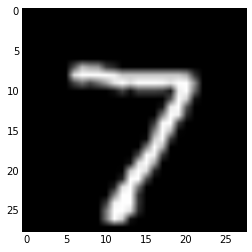

Prediction: 2


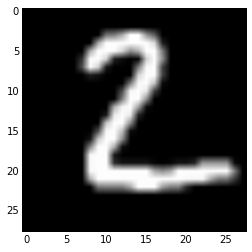

Prediction: 1


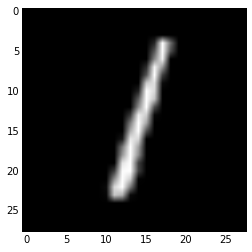

Prediction: 0


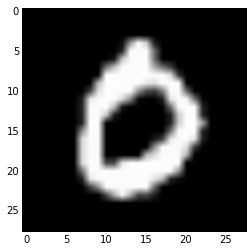

Prediction: 4


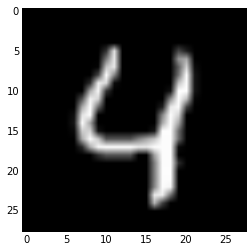

Prediction: 1


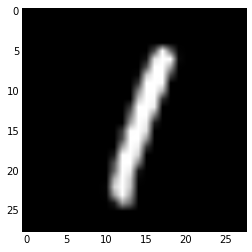

Prediction: 4


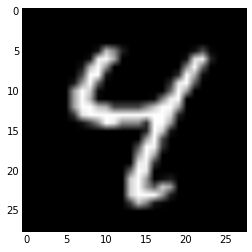

Prediction: 9


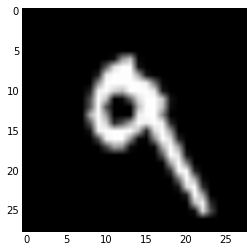

Prediction: 6


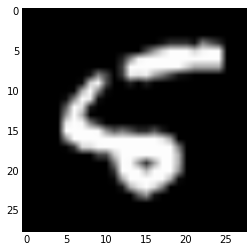

Prediction: 9


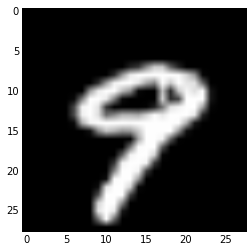

In [50]:
# making predictions

#%% Predictions
import numpy as np
import matplotlib.pyplot as plt 

predictions = model.predict(X_test) 
for i in range(10):
    plt.imshow(np.reshape(X_test[i], (28, 28)), cmap='gray') 
    print("Prediction:", np.argmax(predictions[i])) 
    plt.show()

In [52]:
predictions[0] # probability vector of digit 0-9
np.argmax(predictions[i]) # give digit with a highest probability

array([  1.58675321e-04,   1.05609752e-06,   2.65009381e-04,
         1.64050586e-03,   4.20976357e-06,   1.28825835e-04,
         1.37986362e-07,   9.96699154e-01,   2.89545769e-05,
         1.07344927e-03])